# Introduction and Business Problem

**Introduction:**
- The city of Hoboken, NJ is small at ~1 square mile but it is packed with restaurants, night life . For people that are new to Hoboken, despite its small geographic size, it can be daunting to figure out what restaurants are worth going to and where they are.  For people that used to live in Hoboken or are visiting Hoboken, how do you know what the best places are to get something to eat?
        
    
    
**Business Problem:**
- For this project, I am going to create a simple guide on where to eat based on Foursquare ratings, price, category and geographic location data for restaurants in Hoboken.  I will then cluster these restaurants based on their similarities so that a user can easily determine what type cuisine they are looking for and in what price range

# Data Required

Using the Foursquare API to pull the following location data on restaurants in Hoboken, NJ:
- Venue Name
- Venue ID
- Venue Location
- Venue Category
- Rating
- Price
- Count of Likes
- Phrases


# Data Acquisition Approach

To acquire the data mentioned above, I will need to do the following:

- Get geolocator lat and long coordinates for Hoboken, NJ
- Use Foursquare API to get a list of all venues in Hoboken
    - Get venue name, venue ID, location, category, and likes

# Algorithm Used

Using the data acquired from 4 squre (see above in Data Acquisition Approach and Data Required sections) create a k-means clustering algorithm that groups restaurants into 4-5 clusters so that people looking to eat in Hoboken can easily identify restaurants will cater to what their needs.



# Data Prep and Pull

We will import our necessary packages and start pulling our data for data prep and usage.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#import beautiful soup
from urllib.request import urlopen
from bs4 import BeautifulSoup


print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

   

# Finding the geo data for Hoboken

Let's find the geographic data for Hoboken so we can pull it from FourSquare.

In [2]:
address = 'Hoboken, New Jersey'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Hoboken are {}, {}.'.format(latitude, longitude))

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of Hoboken are 40.7433066, -74.0323752.


# FourSquare Part 1 

Entering in our information into the Foursquare API to access it.


In [3]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: UI1GTXNA5FGGAMAHX13BSP0G1UZVUD5ZRRYMIGZXBLSMQVPG
CLIENT_SECRET:NUGVEFSFR33GPNEDNYYAXBDL0KK2YD1XMFMPH3PLSP3R05RE


# FourSquare Part 2

Creating a URL for all of the venues in Hoboken

In [4]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=UI1GTXNA5FGGAMAHX13BSP0G1UZVUD5ZRRYMIGZXBLSMQVPG&client_secret=NUGVEFSFR33GPNEDNYYAXBDL0KK2YD1XMFMPH3PLSP3R05RE&v=20180605&ll=40.7433066,-74.0323752&radius=500&limit=100'

# FourSquare Part 3

Pulling the JSON for the URL of venues.


In [5]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c5da9526a60717af1a54cf6'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4cdf46dadb125481eb4236ce-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d175941735',
         'name': 'Gym / Fitness Center',
         'pluralName': 'Gyms or Fitness Centers',
         'primary': True,
         'shortName': 'Gym / Fitness'}],
       'id': '4cdf46dadb125481eb4236ce',
       'location': {'address': '603 Willow Ave',
        'cc': 'US',
        'city': 'Hoboken',
        'country': 'United States',
        'distance': 117,
        'formattedAddress': ['603 Willow Ave',
         'Hoboken, NJ 07030',
         'United States'],
        'labeledLatLngs': [{'label': 'display',

# Foursquare Part 4

Now we start pulling the data from Foursquare into a dataframe so we can manipulate and use it.

In [6]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [7]:
#pull the actual data from the Foursquare API

venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
filtered_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues

,venue.name,venue.id,venue.categories,venue.location.lat,venue.location.lng
0,Work It Out-A Fitness Boutique,4cdf46dadb125481eb4236ce,Gym / Fitness Center,40.744356,-74.032567
1,Onieal's Restaurant & Bar,45e9482df964a52075431fe3,Pub,40.741608,-74.032304
2,Sweet,4a4e740ff964a5207bae1fe3,Bakery,40.741623,-74.031523
3,Church Square Park,49e9e49df964a5200a661fe3,Park,40.742152,-74.032230
4,Grand Vin,56d3b920498ec4e1c67c0907,Cocktail Bar,40.743209,-74.035099
5,Fiore's Deli,4a1098a2f964a520e3761fe3,Deli / Bodega,40.742995,-74.035981
6,O'Bagel,56daf06fcd107605ef3d86ea,Bagel Shop,40.743603,-74.029173
7,Ayame Hibachi & Sushi,4dbc9859f7b1ab37dd636d12,Sushi Restaurant,40.743105,-74.029213
8,Kung Fu Tea,57168865498e9517f09fa03d,Bubble Tea Shop,40.743375,-74.029450
9,Anthropologie,51f1c7e1498e7425c21efab6,Women's Store,40.741838,-74.029662


In [8]:
#fix the column names so they look relatively normal

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,id,categories,lat,lng
0,Work It Out-A Fitness Boutique,4cdf46dadb125481eb4236ce,Gym / Fitness Center,40.744356,-74.032567
1,Onieal's Restaurant & Bar,45e9482df964a52075431fe3,Pub,40.741608,-74.032304
2,Sweet,4a4e740ff964a5207bae1fe3,Bakery,40.741623,-74.031523
3,Church Square Park,49e9e49df964a5200a661fe3,Park,40.742152,-74.032230
4,Grand Vin,56d3b920498ec4e1c67c0907,Cocktail Bar,40.743209,-74.035099
5,Fiore's Deli,4a1098a2f964a520e3761fe3,Deli / Bodega,40.742995,-74.035981
6,O'Bagel,56daf06fcd107605ef3d86ea,Bagel Shop,40.743603,-74.029173
7,Ayame Hibachi & Sushi,4dbc9859f7b1ab37dd636d12,Sushi Restaurant,40.743105,-74.029213
8,Kung Fu Tea,57168865498e9517f09fa03d,Bubble Tea Shop,40.743375,-74.029450
9,Anthropologie,51f1c7e1498e7425c21efab6,Women's Store,40.741838,-74.029662


In [9]:
# find a list of unique categories from the API so we can see what may or may not fit for restaurants

nearby_venues['categories'].unique()

array(['Gym / Fitness Center', 'Pub', 'Bakery', 'Park', 'Cocktail Bar',
       'Deli / Bodega', 'Bagel Shop', 'Sushi Restaurant',
       'Bubble Tea Shop', "Women's Store", 'Indian Restaurant',
       'Sporting Goods Shop', 'American Restaurant', 'Coffee Shop',
       'Falafel Restaurant', 'Italian Restaurant', 'Pizza Place',
       'Burger Joint', 'South American Restaurant', 'Ice Cream Shop',
       'Dog Run', 'Cuban Restaurant', 'Gaming Cafe', 'Optical Shop',
       'Yoga Studio', 'Pet Store', 'Bar', 'Seafood Restaurant',
       'Latin American Restaurant', 'Japanese Restaurant', 'Shoe Repair',
       'Mexican Restaurant', 'Boutique', 'Sandwich Place', 'Poke Place',
       'Korean Restaurant', 'Jewelry Store', 'Record Shop', 'Sports Bar',
       'Juice Bar', 'Cosmetics Shop', 'Tea Room', 'Business Service',
       'Restaurant', 'Donut Shop', 'Salon / Barbershop', 'Liquor Store',
       'Grocery Store', 'Stationery Store', 'Thai Restaurant',
       'Pilates Studio', 'Dive Bar', 'Dess

In [10]:
# creating a list of categorie to remove from our dataframe because they are not restaurants
# I am sure there is a function that can be written to do this at scale but since it was a small list, I did it manually

removal_list = ['Gym / Fitness Center', 'Bakery', 'Park', "Women's Store", 'Sporting Goods Shop', 'Dog Run', 'Gaming Cafe',
               'Optical Shop', 'Yoga Studio', 'Pet Store', 'Shoe Repair', 'Jewelry Store', 'Record Shop', 'Juice Bar', 
               'Cosmetics Shop', 'Business Service', 'Salon / Barbershop', 'Liquor Store', 'Grocery Store', 'Stationery Store',
               'Pilates Studio', 'Dessert Shop', 'Bookstore', 'Concert Hall', 'Video Game Store', 'Pharmacy', 'Mobile Phone Shop',
               'Deli / Bodega']

nearby_venues2 = nearby_venues.copy()


#getting a clear dataframe of just restaurants
nearby_venues2 = nearby_venues2[~nearby_venues2['categories'].isin(removal_list)]
nearby_venues2

,name,id,categories,lat,lng
1,Onieal's Restaurant & Bar,45e9482df964a52075431fe3,Pub,40.741608,-74.032304
4,Grand Vin,56d3b920498ec4e1c67c0907,Cocktail Bar,40.743209,-74.035099
6,O'Bagel,56daf06fcd107605ef3d86ea,Bagel Shop,40.743603,-74.029173
7,Ayame Hibachi & Sushi,4dbc9859f7b1ab37dd636d12,Sushi Restaurant,40.743105,-74.029213
8,Kung Fu Tea,57168865498e9517f09fa03d,Bubble Tea Shop,40.743375,-74.029450
10,Karma Kafe,582dfc9565be5809f6a964ed,Indian Restaurant,40.742373,-74.029376
13,Court Street Bar & Restaurant,4a7eff1cf964a5206ff21fe3,American Restaurant,40.743322,-74.028615
15,Empire Coffee & Tea,49f37b88f964a520a26a1fe3,Coffee Shop,40.741375,-74.030515
16,Mamoun's Falafel,4d9368407b5ea1437d14c8b8,Falafel Restaurant,40.742303,-74.029465
17,Zack's Oak Bar & Restaurant,49f26862f964a520296a1fe3,American Restaurant,40.740640,-74.033826


# Foursquare Part 5

Now let's get a list of venue ids so we can pull likes and add to our dataframe.

In [11]:
#let's get a list of venues

venue_id_list = nearby_venues2['id'].tolist()
venue_id_list

['45e9482df964a52075431fe3',
 '56d3b920498ec4e1c67c0907',
 '56daf06fcd107605ef3d86ea',
 '4dbc9859f7b1ab37dd636d12',
 '57168865498e9517f09fa03d',
 '582dfc9565be5809f6a964ed',
 '4a7eff1cf964a5206ff21fe3',
 '49f37b88f964a520a26a1fe3',
 '4d9368407b5ea1437d14c8b8',
 '49f26862f964a520296a1fe3',
 '4a7b5b6bf964a520c8ea1fe3',
 '4ca50f407334236a60ef1258',
 '4cdb36c1958f236a15a7ab03',
 '53ed3b37498e4151087521a9',
 '49e2a407f964a52045621fe3',
 '4d4218cd607b6dcb31df08c6',
 '49dfb562f964a52001611fe3',
 '4eb1b6859adfb95b77765bf9',
 '4a9ac1b1f964a520813220e3',
 '4ad12c5ef964a5203ddd20e3',
 '4a453f9cf964a520f4a71fe3',
 '57f83f7acd10164c2ec1956f',
 '4c03f2fe39d476b0f5c530a7',
 '4c60c4a1de6920a111ed9664',
 '527f3d1711d2f7f001c656b2',
 '4a9578dff964a520562320e3',
 '58e7ed715f67173549fe6246',
 '49ee57f6f964a5204f681fe3',
 '4bddbf6be75c0f47f171c503',
 '5a888bc2c47cf91545daec08',
 '4a8da189f964a520501020e3',
 '58c470fd37da1d593431c33a',
 '4c41e1aee26920a1981e5fe7',
 '51070e83e4b0d92d935e04a3',
 '5a6b6047f427

In [12]:
#set up to pull the likes from the API based on venue ID

url_list = []
like_list = []
json_list = []

for i in venue_id_list:
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list.append(venue_url)
for link in url_list:
    result = requests.get(link).json()
    likes = result['response']['likes']['count']
    like_list.append(likes)
print(like_list)

[151, 62, 60, 66, 28, 35, 98, 131, 268, 116, 35, 136, 81, 81, 101, 179, 62, 163, 162, 42, 68, 28, 32, 64, 50, 76, 63, 13, 4, 11, 71, 23, 16, 23, 31, 21, 71, 68, 30, 103, 108, 119, 10, 39, 11, 9, 44, 13, 48, 10, 45, 20, 31, 24, 20, 65, 72, 31, 18, 29, 29]


In [13]:
#double check that we did not lose any venues based on if likes were available

print(len(like_list))
print(len(venue_id_list))

61
61


# Data Prep Intro

The thought process behind this is that likes are a proxy for quality.  The more likes there are, the better the restaurant is.  This might be incorrect but API call issues (how many I can use for free) holds me back from getting price / rating data.  I will then bin this data into a quality categorical variables so we can cluster appropriately.

I am also going to create new categorical variables for the restaurants to better group them based on type of cuisine.  This way you can look for good mexican food or now what type of food might be best to eat in Hoboken if you are new to the area.

# Data Prep Part 1

Now let's start prepping our data for clustering.  This will include combining data from different lists, creating new categorical data to be used, binning data and then encoding the data for clustering.

In [14]:
#let's make a copy of our initial dataframe just in case anything goes wrong

hoboken_venues = nearby_venues2.copy()
hoboken_venues.head()

,name,id,categories,lat,lng
1,Onieal's Restaurant & Bar,45e9482df964a52075431fe3,Pub,40.741608,-74.032304
4,Grand Vin,56d3b920498ec4e1c67c0907,Cocktail Bar,40.743209,-74.035099
6,O'Bagel,56daf06fcd107605ef3d86ea,Bagel Shop,40.743603,-74.029173
7,Ayame Hibachi & Sushi,4dbc9859f7b1ab37dd636d12,Sushi Restaurant,40.743105,-74.029213
8,Kung Fu Tea,57168865498e9517f09fa03d,Bubble Tea Shop,40.743375,-74.029450


# Data Prep Part 2

Let's combine our list of likes into our dataframe

In [15]:
# add in the list of likes

hoboken_venues['total likes'] = like_list
hoboken_venues.head()

,name,id,categories,lat,lng,total likes
1,Onieal's Restaurant & Bar,45e9482df964a52075431fe3,Pub,40.741608,-74.032304,151
4,Grand Vin,56d3b920498ec4e1c67c0907,Cocktail Bar,40.743209,-74.035099,62
6,O'Bagel,56daf06fcd107605ef3d86ea,Bagel Shop,40.743603,-74.029173,60
7,Ayame Hibachi & Sushi,4dbc9859f7b1ab37dd636d12,Sushi Restaurant,40.743105,-74.029213,66
8,Kung Fu Tea,57168865498e9517f09fa03d,Bubble Tea Shop,40.743375,-74.029450,28


# Data Prep 3
Let's look at our like data to set bins

In [16]:
# now let's bin total likes

print(hoboken_venues['total likes'].max())
print(hoboken_venues['total likes'].min())
print(hoboken_venues['total likes'].median())
print(hoboken_venues['total likes'].mean())

268
4
45.0
60.950819672131146


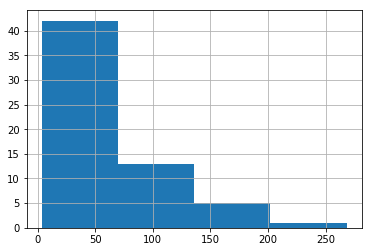

In [17]:
# let's visualize our total likes based on a histogram

import matplotlib.pyplot as plt
hoboken_venues['total likes'].hist(bins=4)
plt.show()

In [18]:
# what are the bins we want to use?

print(np.percentile(hoboken_venues['total likes'], 25))
print(np.percentile(hoboken_venues['total likes'], 50))
print(np.percentile(hoboken_venues['total likes'], 75))

24.0
45.0
76.0


In [19]:
# now we have our bin values so let's set them to the appropriate values
# less than 24, 24-45, 45-76, 76>
# poor, below avg, abv avg, great

poor = hoboken_venues['total likes']<=24
below_avg = hoboken_venues[(hoboken_venues['total likes']>24) & (hoboken_venues['total likes']<=45)]
abv_avg = hoboken_venues[(hoboken_venues['total likes']>45) & (hoboken_venues['total likes']<=76)]
great = hoboken_venues['total likes']>76



In [20]:
# let's set up a function that will re-categorize our restaurants based on likes

def conditions(s):
    if s['total likes']<=24:
        return 'poor'
    if s['total likes']<=45:
        return 'below avg'
    if s['total likes']<=76:
        return 'avg avg'
    if s['total likes']>76:
        return 'great'

hoboken_venues['total likes_cat']=hoboken_venues.apply(conditions, axis=1)

In [21]:
hoboken_venues

,name,id,categories,lat,lng,total likes,total likes_cat
1,Onieal's Restaurant & Bar,45e9482df964a52075431fe3,Pub,40.741608,-74.032304,151,great
4,Grand Vin,56d3b920498ec4e1c67c0907,Cocktail Bar,40.743209,-74.035099,62,avg avg
6,O'Bagel,56daf06fcd107605ef3d86ea,Bagel Shop,40.743603,-74.029173,60,avg avg
7,Ayame Hibachi & Sushi,4dbc9859f7b1ab37dd636d12,Sushi Restaurant,40.743105,-74.029213,66,avg avg
8,Kung Fu Tea,57168865498e9517f09fa03d,Bubble Tea Shop,40.743375,-74.029450,28,below avg
10,Karma Kafe,582dfc9565be5809f6a964ed,Indian Restaurant,40.742373,-74.029376,35,below avg
13,Court Street Bar & Restaurant,4a7eff1cf964a5206ff21fe3,American Restaurant,40.743322,-74.028615,98,great
15,Empire Coffee & Tea,49f37b88f964a520a26a1fe3,Coffee Shop,40.741375,-74.030515,131,great
16,Mamoun's Falafel,4d9368407b5ea1437d14c8b8,Falafel Restaurant,40.742303,-74.029465,268,great
17,Zack's Oak Bar & Restaurant,49f26862f964a520296a1fe3,American Restaurant,40.740640,-74.033826,116,great


In [22]:
# let's star the process for re-categorizing the categories

hoboken_venues['categories'].unique()

array(['Pub', 'Cocktail Bar', 'Bagel Shop', 'Sushi Restaurant',
       'Bubble Tea Shop', 'Indian Restaurant', 'American Restaurant',
       'Coffee Shop', 'Falafel Restaurant', 'Italian Restaurant',
       'Pizza Place', 'Burger Joint', 'South American Restaurant',
       'Ice Cream Shop', 'Cuban Restaurant', 'Bar', 'Seafood Restaurant',
       'Latin American Restaurant', 'Japanese Restaurant',
       'Mexican Restaurant', 'Boutique', 'Sandwich Place', 'Poke Place',
       'Korean Restaurant', 'Sports Bar', 'Tea Room', 'Restaurant',
       'Donut Shop', 'Thai Restaurant', 'Dive Bar', 'Vietnamese Restaurant'], dtype=object)

In [23]:
# let's create our new categories and create a function to apply those to our existing data


bars = ['Pub', 'Cocktail Bar', 'Bar', 'Dive Bar', 'Sports Bar']
other = ['Bagel Shop', 'Tea Room', 'Donut Shop', 'Coffee Shop', 'Bubble Tea Shop', 'Sandwich Place', 'Boutique', 'Ice Cream Shop']
euro_asia_indian_food = ['Falafel Restaurant', 'Korean Restaurant','Sushi Restaurant', 'Indian Restaurant', 'Japanese Restaurant', 'Poke Place', 'Thai Restaurant', 'Vietnamese Restaurant']
mex_southam_food = ['Cuban Restaurant', 'Mexican Restaurant', 'South American Restaurant', 'Latin American Restaurant']
american_food = ['Burger Joint', 'Restaurant', 'American Restaurant']
italian_food = ['Italian Restaurant', 'Seafood Restaurant', 'Pizza Place']

def conditions2(s):
    if s['categories'] in bars:
        return 'bars'
    if s['categories'] in other:
        return 'other'
    if s['categories'] in euro_asia_indian_food:
        return 'euro asia indian food'
    if s['categories'] in mex_southam_food:
        return 'mex southam food'
    if s['categories'] in american_food:
        return 'american food'
    if s['categories'] in italian_food:
        return 'italian food'

hoboken_venues['categories_new']=hoboken_venues.apply(conditions2, axis=1)

In [69]:
hoboken_venues

,name,id,categories,lat,lng,total likes,total likes_cat,Neighborhood,categories_new
1,Onieal's Restaurant & Bar,45e9482df964a52075431fe3,Pub,40.741608,-74.032304,151,great,Hoboken,bars
4,Grand Vin,56d3b920498ec4e1c67c0907,Cocktail Bar,40.743209,-74.035099,62,avg avg,Hoboken,bars
6,O'Bagel,56daf06fcd107605ef3d86ea,Bagel Shop,40.743603,-74.029173,60,avg avg,Hoboken,other
7,Ayame Hibachi & Sushi,4dbc9859f7b1ab37dd636d12,Sushi Restaurant,40.743105,-74.029213,66,avg avg,Hoboken,euro asia indian food
8,Kung Fu Tea,57168865498e9517f09fa03d,Bubble Tea Shop,40.743375,-74.029450,28,below avg,Hoboken,other
10,Karma Kafe,582dfc9565be5809f6a964ed,Indian Restaurant,40.742373,-74.029376,35,below avg,Hoboken,euro asia indian food
13,Court Street Bar & Restaurant,4a7eff1cf964a5206ff21fe3,American Restaurant,40.743322,-74.028615,98,great,Hoboken,american food
15,Empire Coffee & Tea,49f37b88f964a520a26a1fe3,Coffee Shop,40.741375,-74.030515,131,great,Hoboken,other
16,Mamoun's Falafel,4d9368407b5ea1437d14c8b8,Falafel Restaurant,40.742303,-74.029465,268,great,Hoboken,euro asia indian food
17,Zack's Oak Bar & Restaurant,49f26862f964a520296a1fe3,American Restaurant,40.740640,-74.033826,116,great,Hoboken,american food


# Data Prep Part 4

Now let's create dummy variables for our total likes and categories so we can cluster

In [24]:
# one hot encoding
hoboken_onehot = pd.get_dummies(hoboken_venues[['categories_new', 'total likes_cat']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
hoboken_onehot['Name'] = hoboken_venues['name'] 

# move neighborhood column to the first column
fixed_columns = [hoboken_onehot.columns[-1]] + list(hoboken_onehot.columns[:-1])
hoboken_onehot = hoboken_onehot[fixed_columns]

hoboken_onehot.head()

,Name,american food,bars,euro asia indian food,italian food,mex southam food,other,avg avg,below avg,great,poor
1,Onieal's Restaurant & Bar,0,1,0,0,0,0,0,0,1,0
4,Grand Vin,0,1,0,0,0,0,1,0,0,0
6,O'Bagel,0,0,0,0,0,1,1,0,0,0
7,Ayame Hibachi & Sushi,0,0,1,0,0,0,1,0,0,0
8,Kung Fu Tea,0,0,0,0,0,1,0,1,0,0


# Clustering Part 1

Now let's run our k-means clustering algo to get our labels

In [25]:
cluster_df = hoboken_onehot.drop('Name', axis=1)

k_clusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=k_clusters, random_state=0).fit(cluster_df)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 3, 3, 3, 1, 1, 2, 2, 2, 2], dtype=int32)

# Clustering Part 2

Let's add our cluster labels back into our original dataframe.

In [26]:
hoboken_venues['label'] = kmeans.labels_
hoboken_venues.head()

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
1,Onieal's Restaurant & Bar,45e9482df964a52075431fe3,Pub,40.741608,-74.032304,151,great,bars,2
4,Grand Vin,56d3b920498ec4e1c67c0907,Cocktail Bar,40.743209,-74.035099,62,avg avg,bars,3
6,O'Bagel,56daf06fcd107605ef3d86ea,Bagel Shop,40.743603,-74.029173,60,avg avg,other,3
7,Ayame Hibachi & Sushi,4dbc9859f7b1ab37dd636d12,Sushi Restaurant,40.743105,-74.029213,66,avg avg,euro asia indian food,3
8,Kung Fu Tea,57168865498e9517f09fa03d,Bubble Tea Shop,40.743375,-74.029450,28,below avg,other,1


# Clustering Part 3 

Now let's visualize what our clusters look like for Hoboken.

In [27]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i+x+(i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(hoboken_venues['lat'], hoboken_venues['lng'], hoboken_venues['name'], hoboken_venues['label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Clustering Part 4

Now let's see what is in each of our clusters

# Cluster 1

- characteristics
    - Poor quality food
    - Mostly Italian food or other

In [28]:
hoboken_venues.loc[hoboken_venues['label']==0]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
42,Hoboken Burrito,49ee57f6f964a5204f681fe3,Mexican Restaurant,40.741822,-74.031881,13,poor,mex southam food,0
43,Townhouse No 620,4bddbf6be75c0f47f171c503,Boutique,40.744128,-74.029070,4,poor,other,0
44,Jefferson’s Coffee,5a888bc2c47cf91545daec08,Coffee Shop,40.743368,-74.029135,11,poor,other,0
46,Makai Poke Co,58c470fd37da1d593431c33a,Poke Place,40.742852,-74.029213,23,poor,euro asia indian food,0
47,Chicken Factory,4c41e1aee26920a1981e5fe7,Korean Restaurant,40.742975,-74.029083,16,poor,euro asia indian food,0
49,Midtown Philly Steaks,51070e83e4b0d92d935e04a3,Sandwich Place,40.742983,-74.029211,23,poor,other,0
51,Mr Wrap's,4ad89c0bf964a520d31221e3,American Restaurant,40.746308,-74.030003,21,poor,american food,0
64,Flatbread Grill,55d52901498ea18f871d5f9e,Restaurant,40.742767,-74.029281,10,poor,american food,0
66,Pita Pit,56f136ad498ecc5661aa49ce,Sandwich Place,40.745729,-74.028582,11,poor,other,0
70,Sauced,5ac2cec0419a9e0f679671f3,Sandwich Place,40.739274,-74.030205,9,poor,other,0


# Cluster 2

- characteristics
    - below average quality food
    - Mostly Europe / Asia inspired food

In [29]:
hoboken_venues.loc[hoboken_venues['label']==1]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
8,Kung Fu Tea,57168865498e9517f09fa03d,Bubble Tea Shop,40.743375,-74.029450,28,below avg,other,1
10,Karma Kafe,582dfc9565be5809f6a964ed,Indian Restaurant,40.742373,-74.029376,35,below avg,euro asia indian food,1
18,Cafe Michelina,4a7b5b6bf964a520c8ea1fe3,Italian Restaurant,40.742278,-74.030218,35,below avg,italian food,1
33,Moran's Pub,4ad12c5ef964a5203ddd20e3,Bar,40.742553,-74.031192,42,below avg,bars,1
35,Tutta Pesca,57f83f7acd10164c2ec1956f,Seafood Restaurant,40.740163,-74.031284,28,below avg,italian food,1
36,Ultramarinos,4c03f2fe39d476b0f5c530a7,Latin American Restaurant,40.740620,-74.033490,32,below avg,mex southam food,1
50,Mamoun’s Falafel,5a6b6047f427de038c51031c,Falafel Restaurant,40.740090,-74.030374,31,below avg,euro asia indian food,1
58,Maroon,4a9703def964a520fb2720e3,Tea Room,40.745307,-74.032359,30,below avg,other,1
65,Dunkin' Donuts,4b191a58f964a520ffd723e3,Donut Shop,40.744813,-74.028812,39,below avg,other,1
74,Sri Thai,49e27ed2f964a5201c621fe3,Thai Restaurant,40.740103,-74.030955,44,below avg,euro asia indian food,1


# Cluster 3

- characteristics
    - High quality food
    - Mostly Mexican and South American food

In [30]:
hoboken_venues.loc[hoboken_venues['label']==2]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
1,Onieal's Restaurant & Bar,45e9482df964a52075431fe3,Pub,40.741608,-74.032304,151,great,bars,2
13,Court Street Bar & Restaurant,4a7eff1cf964a5206ff21fe3,American Restaurant,40.743322,-74.028615,98,great,american food,2
15,Empire Coffee & Tea,49f37b88f964a520a26a1fe3,Coffee Shop,40.741375,-74.030515,131,great,other,2
16,Mamoun's Falafel,4d9368407b5ea1437d14c8b8,Falafel Restaurant,40.742303,-74.029465,268,great,euro asia indian food,2
17,Zack's Oak Bar & Restaurant,49f26862f964a520296a1fe3,American Restaurant,40.740640,-74.033826,116,great,american food,2
19,Grimaldi's,4ca50f407334236a60ef1258,Pizza Place,40.741674,-74.029578,136,great,italian food,2
20,Robongi,4cdb36c1958f236a15a7ab03,Sushi Restaurant,40.742879,-74.029280,81,great,euro asia indian food,2
22,Bareburger,53ed3b37498e4151087521a9,Burger Joint,40.742694,-74.029070,81,great,american food,2
23,Cucharamama,49e2a407f964a52045621fe3,South American Restaurant,40.740807,-74.034582,101,great,mex southam food,2
24,Cork City Pub,4d4218cd607b6dcb31df08c6,Pub,40.740105,-74.030868,179,great,bars,2


# Cluster 4

- characteristics
    - Above average quality food
    - Mostly Bars

In [31]:
hoboken_venues.loc[hoboken_venues['label']==3]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
4,Grand Vin,56d3b920498ec4e1c67c0907,Cocktail Bar,40.743209,-74.035099,62,avg avg,bars,3
6,O'Bagel,56daf06fcd107605ef3d86ea,Bagel Shop,40.743603,-74.029173,60,avg avg,other,3
7,Ayame Hibachi & Sushi,4dbc9859f7b1ab37dd636d12,Sushi Restaurant,40.743105,-74.029213,66,avg avg,euro asia indian food,3
25,Ben & Jerry's,49dfb562f964a52001611fe3,Ice Cream Shop,40.741430,-74.029484,62,avg avg,other,3
34,Zafra,4a453f9cf964a520f4a71fe3,Cuban Restaurant,40.740659,-74.033802,68,avg avg,mex southam food,3
37,Dozzino,4c60c4a1de6920a111ed9664,Pizza Place,40.744612,-74.035632,64,avg avg,italian food,3
38,Otto Strada,527f3d1711d2f7f001c656b2,Italian Restaurant,40.746604,-74.031161,50,avg avg,italian food,3
39,Illuzion,4a9578dff964a520562320e3,Japanese Restaurant,40.741229,-74.029582,76,avg avg,euro asia indian food,3
40,Bluestone Lane,58e7ed715f67173549fe6246,Coffee Shop,40.741601,-74.029410,63,avg avg,other,3
45,Vito's Italian Deli,4a8da189f964a520501020e3,Sandwich Place,40.746401,-74.028310,71,avg avg,other,3
